# Polynomial Regression Model & Deployment

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Advertising.csv')

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
X = df.drop('sales', axis=1)

y = df['sales']

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [16]:
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)

In [17]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [18]:
polynomial_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [19]:
polynomial_converter.transform(X).shape

(200, 9)

In [20]:
X.shape

(200, 3)

In [21]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [22]:
poly_features = polynomial_converter.transform(X)

In [23]:
poly_features.shape

(200, 9)

In [26]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [27]:
poly_features[0] #three real terms, three interaction terms and three interaction squared terms

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [28]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

# Polynomial Regression

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state =101)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
test_predictions = model.predict(X_test)

In [38]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
MAE = mean_absolute_error(y_test, test_predictions)

In [42]:
MAE

0.4896798044803544

In [41]:
MSE = mean_squared_error(y_test, test_predictions)

In [43]:
MSE

0.44175055104033606

In [44]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [45]:
RMSE

0.6646431757268979

In [46]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [47]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [49]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

# Polynomial Regression -Choosing Degree of Polynomial

In [51]:
# Create the different order poly
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train and TEST
# PLOT the results (error vs poly order)

In [57]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree = d, include_bias= False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state =101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [60]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292233,
 0.4339344356902067,
 0.3517083688399347,
 0.25093429835539816,
 0.20714510120053595,
 5.425932586171796,
 0.14133784073898464,
 0.17127082105022187]

In [61]:
test_rmse_errors

[1.5161519375993884,
 0.6646431757268979,
 0.580328682521989,
 0.5077742615961798,
 2.5758059234373105,
 4.2626992027472355,
 1373.8205470801918,
 4230.9043873070605,
 94887.01087410311]

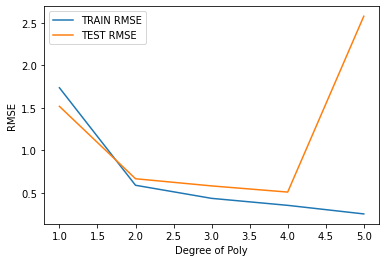

In [63]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

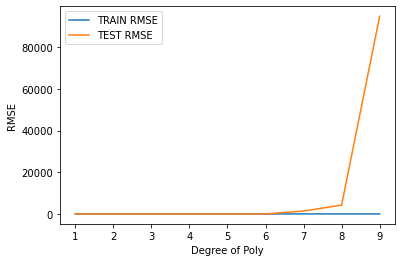

In [65]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree of Poly')
plt.legend()

# Ploynomial Regression Model Deployment

In [67]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias = False)

In [68]:
final_model = LinearRegression()

In [70]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X, y)

LinearRegression()

In [71]:
from joblib import dump, load

In [72]:
dump(final_model, 'final_poly_model.joblib')

['final_poly_model.joblib']

In [73]:
dump(final_poly_converter, 'final_converter.joblib')

['final_converter.joblib']

In [74]:
loaded_converter = load('final_converter.joblib')

In [75]:
loaded_model = load('final_poly_model.joblib')

In [76]:
campaign = [[149, 22, 12]]

In [77]:
loaded_converter.fit_transform(campaign)

array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [78]:
loaded_converter.fit_transform(campaign).shape

(1, 19)

In [79]:
transformed_data =loaded_converter.fit_transform(campaign)

In [80]:
loaded_model.predict(transformed_data)

array([14.64501014])